# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

**What are the null and alternate hypotheses? What test is appropriate for this problem?**
The null hypothesis would be that a candidate's race does NOT play a role (ie is exchangable) in whether or not they get a callback. Conversely, the alternative hypothesis is that it does. Since we are comparing whether a label makes a difference between two groups, a permutation test would be most appropriate to solve this problem. We can create a null distribution of our sample by running a permutation and comparing it to our empirical sample.

**Does CLT apply?**

CLT does not apply to the permutation test.


In [5]:
#subset the permutation to just the race and call back categories, split on race
df_subset = data[['race','call']]
df_black = df_subset[data['race'] == 'b']
df_white = df_subset[data['race'] == 'w']
#find the empirical difference in callbacks between the two racial groups
emp_diff = np.sum(df_white['call']) - np.sum(df_black['call'])
print('Empirical sample difference:', emp_diff)
#run permutation 5000 times, and compare number of callbacks in each permutation to the empirical difference.
perm_replicates = np.empty(5000)
for i in range(5000):
    perm_sample = np.random.permutation(df_subset['call'])
    perm_sample1 = perm_sample[:len(df_black)]
    perm_sample2 = perm_sample[len(df_black):]
    perm_replicates[i] = abs(np.sum(perm_sample1)- np.sum(perm_sample2))
p = np.sum(perm_replicates > emp_diff)
print('Average difference between permutated samples:', round(np.mean(perm_replicates),2))
print('# of instances in which a greater difference was found between the permuatated samples than the empirical samples:', p)


Empirical sample difference: 78.0
Average difference between permutated samples: 14.89
# of instances in which a greater difference was found between the permuatated samples than the empirical samples: 1


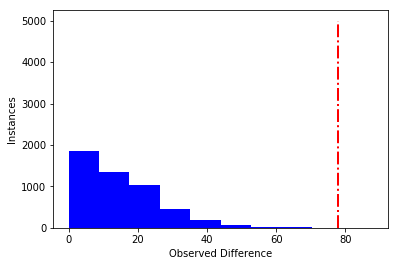

In [6]:
import matplotlib.pyplot as plt

plt.hist(perm_replicates, color='blue')
plt.plot([78, 78], [0, 5000], color='red', linestyle='-.', linewidth=2)
plt.xlabel('Observed Difference')
plt.ylabel('Instances')

plt.show()

**Compute margin of error, confidence interval, and p-value.**

Using a permutation test, we can see quite clearly that when we stimulate resampling the two populations without race classification 5000 times, very few (just one) of our stimulations end up reproducing the same difference we found in our empirical sample (represented by the red line in the figure above).  In other words, if we accept that our null hypothesis that race does not play a role is true, the probability (the p-value) of getting a result as extreme or more extreme than what we observed in our empirical sample is 0.

Unfortunately, margin of error and confidence intervals are not computable from permutation test.

**Write a story describing the statistical significance in the context or the original problem.
Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?**

It would be very difficult to do a full analysis on all 60 columns included in this study. However, we can generalize the bootstrap function used on the race column and apply it to a few other factors. Note than in these cases we *would* expect certain factors such as academic honors, military service, volunteer experience, and employment gaps to make a difference, since those are valid and legal factors that employers assess employees on. The aim of this analysis is to show that these legal factors have as strong of an influence as race, which is an should not be making a difference. 

Note on sample sizes: Since this dataset was cultivated  to test racial bias, the whole dataset is evenly split between black/white in a way that it is not for other factors. To get around this, the size of the permutation samples is the same as either the positive or negative subset, whichever is determined to be smaller.

Before moving on to binary factors, we can quickly test if the applicant's sex is an important factor.

Empirical sample difference: 9.0
Average difference between permutated samples: 10.2
% of instances in which a greater diff was found between the permuatated samples than the empirical samples: 46.0


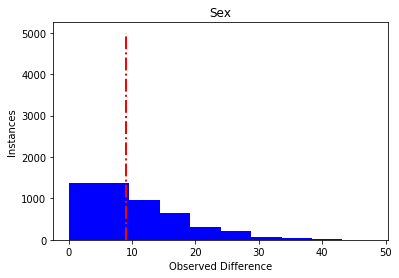

In [8]:
#subset the permutation to just the race and call back categories, split on race
df_subset = data[['sex','call']]
df_male = df_subset[data['sex'] == 'm']
df_female = df_subset[data['sex'] == 'f']

#find the empirical difference in callbacks between the two racial groups
df_female = df_female.sample(n=len(df_male))
emp_diff = abs(np.sum(df_male['call']) - np.sum(df_female['call']))
print('Empirical sample difference:', emp_diff)

#run permutation 5000 times, and compare number of callbacks in each permutation to the empirical difference.
perm_replicates = np.empty(5000) 
for i in range(5000):
    perm_sample = np.random.permutation(df_subset['call'])
    perm_sample1 = perm_sample[:len(df_male)]
    perm_sample2 = perm_sample[-len(df_male):]
    perm_replicates[i] = abs(np.sum(perm_sample1)- np.sum(perm_sample2))
p = round((np.sum(perm_replicates > emp_diff)/len(df_subset)),2)*100
print('Average difference between permutated samples:', round(np.mean(perm_replicates),2))
print('% of instances in which a greater diff was found between the permuatated samples than the empirical samples:', p)

perm_replicates = perm_replicates[~np.isnan(perm_replicates)]
plt.hist(perm_replicates, color='blue')
plt.plot([emp_diff, emp_diff], [0, 5000], color='red', linestyle='-.', linewidth=2)
plt.title('Sex')
plt.xlabel('Observed Difference')
plt.ylabel('Instances')
plt.show()

With a p-value of .46, we cannot say that the applicant's sex is having a significant effect on the rate that they recieve callbacks.

We can run the same process on a list of binary factors that we iterate through:

In [9]:
def bin_perm_tester(factor, perm_runs):
    print('---------------------------------------------------')
    print(factor.upper())
    df_subset = data[[factor,'call']]
    df0 = df_subset[data[factor] == 0]
    df1 = df_subset[data[factor] == 1]
    
    #find the empirical difference in callbacks between the two groups
    if len(df0) > len(df1): 
        df0 = df0.sample(n=len(df1))
    else: 
        df1 = df1.sample(n=len(df0))
    emp_diff = abs(np.sum(df1['call']) - np.sum(df0['call']))
    print('Empirical sample difference for:', factor, ':' , emp_diff)
    print(np.sum(df1['call']),'with', factor, '= TRUE recieved a callback, out of', len(df1))
    print(np.sum(df0['call']),'with', factor, '= FALSE recieved a callback, out of', len(df1))
    
    #run permutation n times, and compare number of callbacks in each permutation to the empirical difference.
    perm_replicates = np.empty(5000)
    for i in range(perm_runs):
        perm_sample = np.random.permutation(df_subset['call'])
        perm_sample1 = perm_sample[:len(df0)]
        perm_sample2 = perm_sample[-len(df0):]
        perm_replicates[i] = abs(np.sum(perm_sample1)- np.sum(perm_sample2))
    p = (np.sum(perm_replicates > emp_diff)/len(perm_replicates))
    print('Average difference between permutated samples:', np.mean(perm_replicates))
    print('% of instances in which a greater diff was found between the permutated samples than the empirical samples:', p*100, '%')
    
    #plot histogram and empirical difference line
    perm_replicates = perm_replicates[~np.isnan(perm_replicates)]
    plt.hist(perm_replicates, color='blue')
    plt.plot([emp_diff, emp_diff], [0, 5000], color='red', linestyle='-.', linewidth=2)
    plt.title(factor)
    plt.xlabel('Observed Difference')
    plt.ylabel('Instances')
    plt.show()

---------------------------------------------------
HONORS
Empirical sample difference for: honors : 20.0
42.0 with honors = TRUE recieved a callback, out of 257
22.0 with honors = FALSE recieved a callback, out of 257
Average difference between permutated samples: 4.902
% of instances in which a greater diff was found between the permutated samples than the empirical samples: 0.06 %


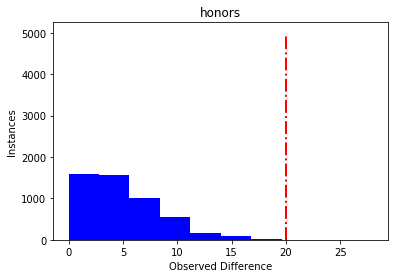

---------------------------------------------------
VOLUNTEER
Empirical sample difference for: volunteer : 4.0
166.0 with volunteer = TRUE recieved a callback, out of 2004
162.0 with volunteer = FALSE recieved a callback, out of 2004
Average difference between permutated samples: 13.7496
% of instances in which a greater diff was found between the permutated samples than the empirical samples: 79.64 %


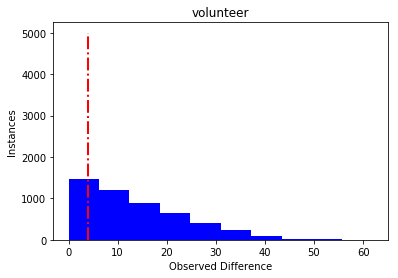

---------------------------------------------------
MILITARY
Empirical sample difference for: military : 6.0
30.0 with military = TRUE recieved a callback, out of 473
36.0 with military = FALSE recieved a callback, out of 473
Average difference between permutated samples: 6.6374
% of instances in which a greater diff was found between the permutated samples than the empirical samples: 42.96 %


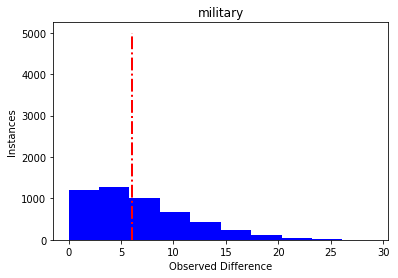

---------------------------------------------------
EMPHOLES
Empirical sample difference for: empholes : 82.0
223.0 with empholes = TRUE recieved a callback, out of 2182
141.0 with empholes = FALSE recieved a callback, out of 2182
Average difference between permutated samples: 14.5712
% of instances in which a greater diff was found between the permutated samples than the empirical samples: 0.0 %


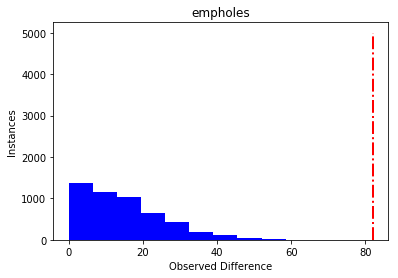

---------------------------------------------------
COMPUTERSKILLS
Empirical sample difference for: computerskills : 20.0
65.0 with computerskills = TRUE recieved a callback, out of 874
85.0 with computerskills = FALSE recieved a callback, out of 874
Average difference between permutated samples: 9.073
% of instances in which a greater diff was found between the permutated samples than the empirical samples: 7.26 %


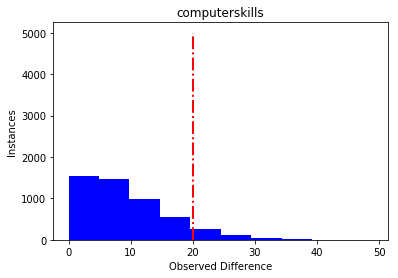

In [10]:
factors = ['honors','volunteer','military','empholes', 'computerskills']
for factor in factors:
    bin_perm_tester(factor, 5000)

Of these five factors, there are some interesting takeaways.
* honors: Academic honors with a p-score of .6% likely has a positive effect on employment.

* volunteer: No significant effect.

* military: No significant effect

* empholes / Holes in Employment History: Generally employers do not like when applicant's have significant gaps in their employment history. With a p-value of 0, we can see that gaps in employment have a strong (negative) effect on callback rate - which is the same case for the primary factor we are investigating, the applicant's race. Therefore, we can say that being black has a similar effect to having significant gaps in employment history when applying to jobs.

* compskills: Computer skills. This is ambigously defined, no significant effect.

In conclusion, we cannot say that race is the *most* important factor in hiring since other factors have similarly low p-values. However, we have demonstrated that race does play a significant rate in callbacks.